In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 50))

<Figure size 2000x5000 with 0 Axes>

<Figure size 2000x5000 with 0 Axes>

In [3]:
file_path = "C:\\Users\\SPANDANA PRIYA\\Downloads\\Hyderabad_ExcelSheet.csv"
data = pd.read_csv(file_path)

Distribution of distances traveled by the cars

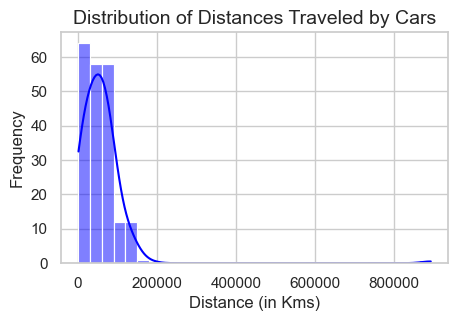

In [5]:
plt.figure(figsize=(5, 3))
sns.histplot(data['DISTANCE (in Kms)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Distances Traveled by Cars', fontsize=14)
plt.xlabel('Distance (in Kms)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Count of cars based on fuel type

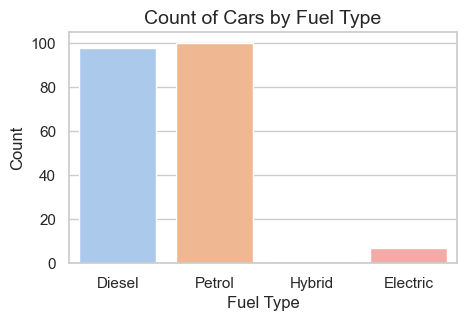

In [8]:
plt.figure(figsize=(5, 3))
sns.countplot(x='FUEL', data=data, hue='FUEL', palette='pastel', dodge=False)  
plt.title('Count of Cars by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend([], [], frameon=False)  
plt.show()

Distribution of car prices

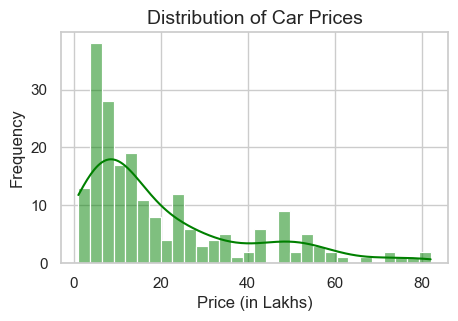

In [11]:
plt.figure(figsize=(5, 3))
data['Price_Numeric'] = data['PRICE'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
sns.histplot(data['Price_Numeric'], bins=30, kde=True, color='green')
plt.title('Distribution of Car Prices', fontsize=14)
plt.xlabel('Price (in Lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Cars by location

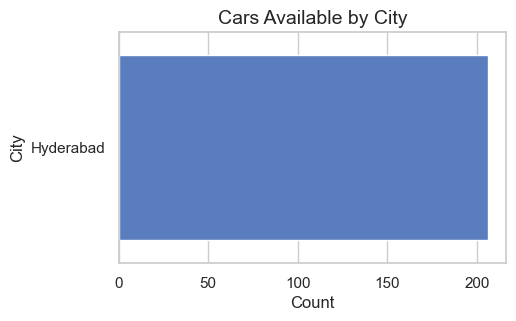

In [16]:
plt.figure(figsize=(5, 3))
data['City'] = data['LOCATION'].str.split(',').str[-1].str.strip()
sns.countplot(y='City', 
              data=data, 
              order=data['City'].value_counts().index, 
              hue='City', 
              dodge=False,  
              palette='muted')
plt.legend([], [], frameon=False)
plt.title('Cars Available by City', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Boxplot of distances by fuel type

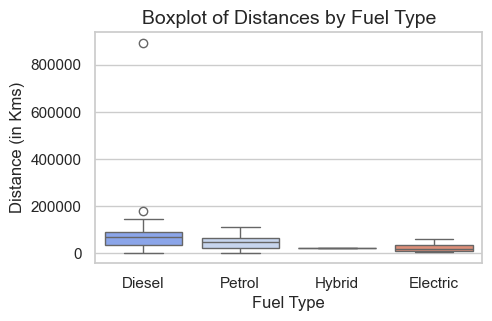

In [20]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='FUEL', 
            y='DISTANCE (in Kms)', 
            data=data, 
            hue='FUEL',  
            dodge=False,  
            palette='coolwarm')
plt.legend([], [], frameon=False)
plt.title('Boxplot of Distances by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Distance (in Kms)', fontsize=12)
plt.show()

Relationship between price and distance traveled

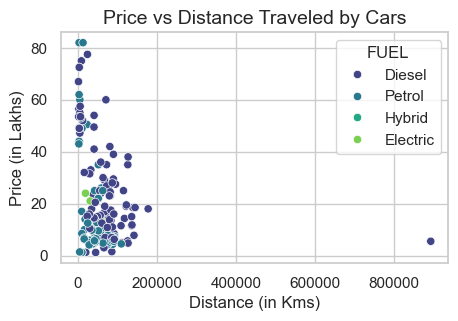

In [21]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='DISTANCE (in Kms)', y='Price_Numeric', hue='FUEL', data=data, palette='viridis')
plt.title('Price vs Distance Traveled by Cars', fontsize=14)
plt.xlabel('Distance (in Kms)', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.show()

Average distance traveled by cars by fuel type

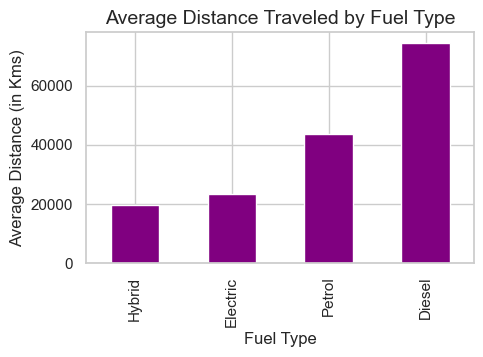

In [22]:
plt.figure(figsize=(5, 3))
average_distance = data.groupby('FUEL')['DISTANCE (in Kms)'].mean().sort_values()
average_distance.plot(kind='bar', color='purple')
plt.title('Average Distance Traveled by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Distance (in Kms)', fontsize=12)
plt.show()

Most expensive cars by brand

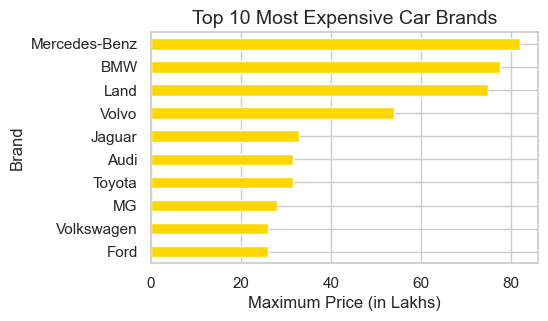

In [23]:
plt.figure(figsize=(5, 3))
data['Brand'] = data['NAME OF THE CAR'].str.split().str[0]
expensive_cars = data.groupby('Brand')['Price_Numeric'].max().sort_values()
expensive_cars[-10:].plot(kind='barh', color='gold')
plt.title('Top 10 Most Expensive Car Brands', fontsize=14)
plt.xlabel('Maximum Price (in Lakhs)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

Boxplot of prices by city

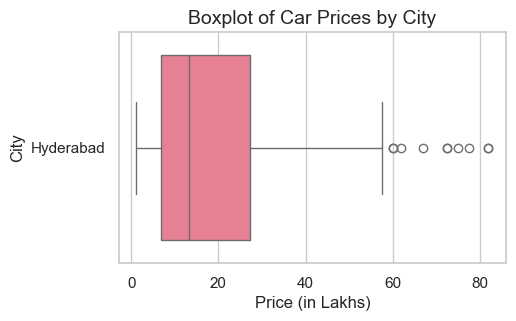

In [25]:
plt.figure(figsize=(5, 3))
sns.boxplot(y='City', 
            x='Price_Numeric', 
            data=data, 
            hue='City',  
            dodge=False,  
            palette='husl')
plt.legend([], [], frameon=False)
plt.title('Boxplot of Car Prices by City', fontsize=14)
plt.xlabel('Price (in Lakhs)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Top 10 cars with highest distance traveled

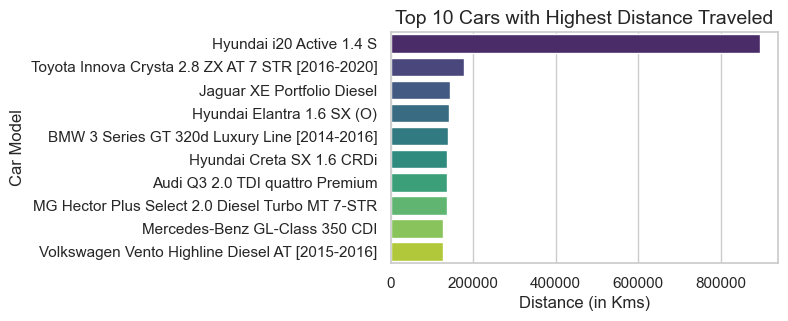

In [30]:
plt.figure(figsize=(5, 3))
top_cars_distance = data.nlargest(10, 'DISTANCE (in Kms)')
sns.barplot(y='NAME OF THE CAR', 
            x='DISTANCE (in Kms)', 
            data=top_cars_distance, 
            palette='viridis', 
            hue='NAME OF THE CAR',  
            dodge=False)  
plt.legend([], [], frameon=False)
plt.title('Top 10 Cars with Highest Distance Traveled', fontsize=14)
plt.xlabel('Distance (in Kms)', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.show()

Distribution of EMI values

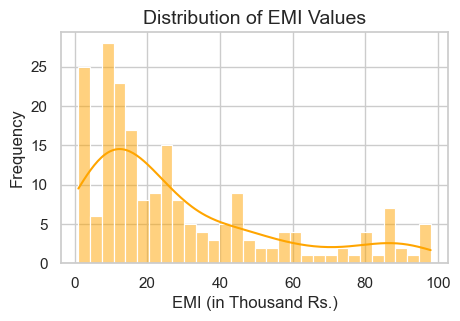

In [33]:
plt.figure(figsize=(5, 3))
data['EMI_Numeric'] = data['EMI'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
sns.histplot(data['EMI_Numeric'], bins=30, kde=True, color='orange')
plt.title('Distribution of EMI Values', fontsize=14)
plt.xlabel('EMI (in Thousand Rs.)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Average price by fuel type

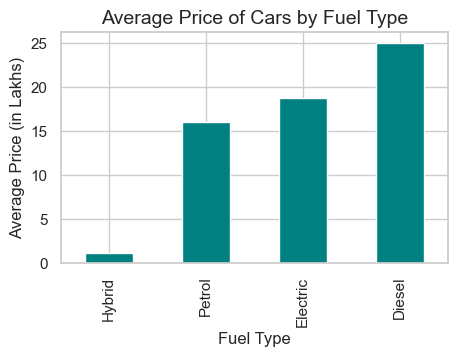

In [34]:
plt.figure(figsize=(5, 3))
average_price = data.groupby('FUEL')['Price_Numeric'].mean().sort_values()
average_price.plot(kind='bar', color='teal')
plt.title('Average Price of Cars by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Price (in Lakhs)', fontsize=12)
plt.show()

Top 10 cities with the highest number of cars

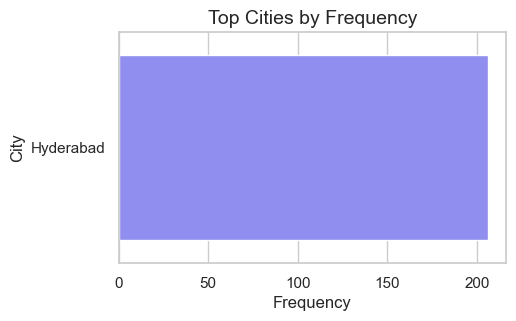

In [36]:
plt.figure(figsize=(5, 3))
sns.barplot(y=top_cities.index, 
            x=top_cities.values, 
            palette='cool', 
            hue=top_cities.index,  
            dodge=False)  
plt.legend([], [], frameon=False)
plt.title('Top Cities by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Heatmap of price vs distance grouped by fuel type

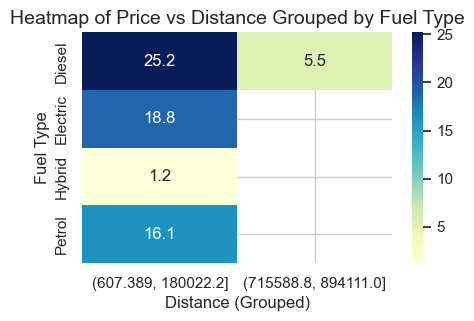

In [38]:
plt.figure(figsize=(5, 3))
grouped = data.pivot_table(values='Price_Numeric', 
                           index='FUEL', 
                           columns=pd.cut(data['DISTANCE (in Kms)'], bins=5), 
                           aggfunc='mean', 
                           observed=False)  
sns.heatmap(grouped, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Heatmap of Price vs Distance Grouped by Fuel Type', fontsize=14)
plt.xlabel('Distance (Grouped)', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.show()

Count of cars by brand

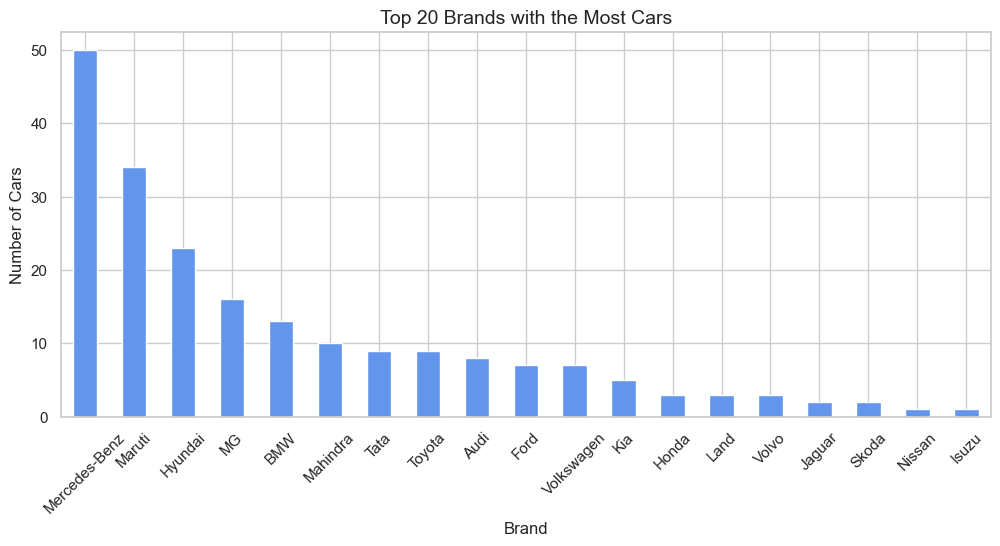

In [46]:
plt.figure(figsize=(12, 5))
brand_count = data['Brand'].value_counts().head(20)
brand_count.plot(kind='bar', color='cornflowerblue')
plt.title('Top 20 Brands with the Most Cars', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Scatter plot of EMI vs Price

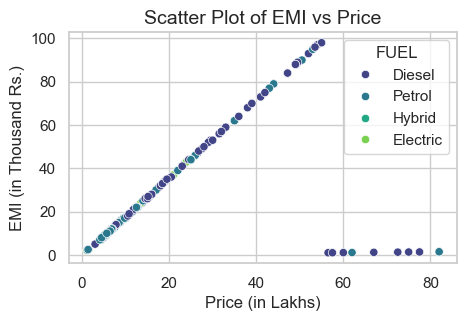

In [47]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Price_Numeric', y='EMI_Numeric', hue='FUEL', data=data, palette='viridis')
plt.title('Scatter Plot of EMI vs Price', fontsize=14)
plt.xlabel('Price (in Lakhs)', fontsize=12)
plt.ylabel('EMI (in Thousand Rs.)', fontsize=12)
plt.show()

Distribution of car availability by price range

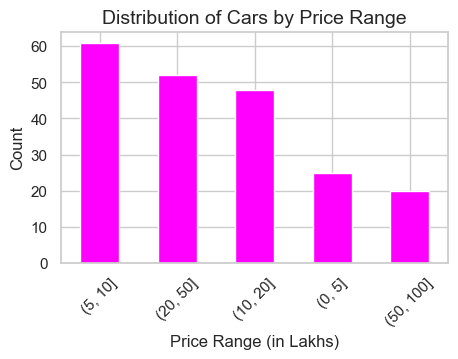

In [48]:
plt.figure(figsize=(5, 3))
price_bins = pd.cut(data['Price_Numeric'], bins=[0, 5, 10, 20, 50, 100])
price_bins.value_counts().plot(kind='bar', color='magenta')
plt.title('Distribution of Cars by Price Range', fontsize=14)
plt.xlabel('Price Range (in Lakhs)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Correlation matrix of numeric features

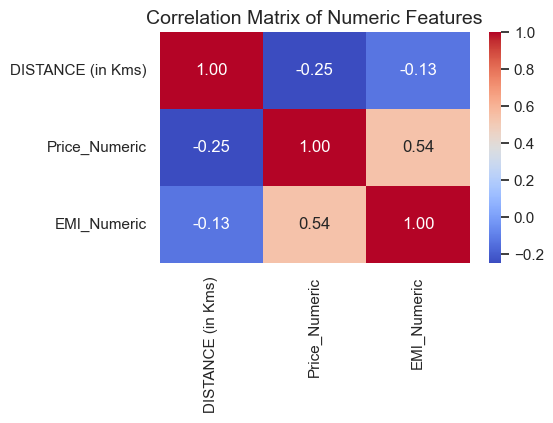

In [49]:
plt.figure(figsize=(5, 3))
correlation_data = data[['DISTANCE (in Kms)', 'Price_Numeric', 'EMI_Numeric']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()

Distribution of distances by city

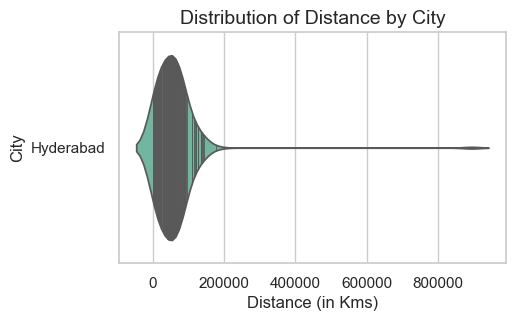

In [51]:
plt.figure(figsize=(5, 3))
sns.violinplot(y='City', 
               x='DISTANCE (in Kms)', 
               data=data, 
               palette='Set2', 
               hue='City',  
               legend=False,  
               density_norm='count',  
               inner='stick')
plt.title('Distribution of Distance by City', fontsize=14)
plt.xlabel('Distance (in Kms)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

Bar plot of average EMI by fuel type

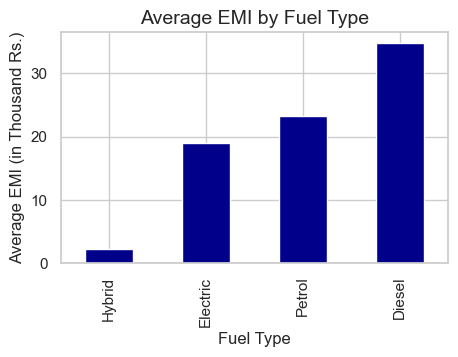

In [52]:
plt.figure(figsize=(5, 3))
average_emi = data.groupby('FUEL')['EMI_Numeric'].mean().sort_values()
average_emi.plot(kind='bar', color='darkblue')
plt.title('Average EMI by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average EMI (in Thousand Rs.)', fontsize=12)
plt.show()